EDA on a Data Set

In [ ]:
# from sklearn.matrics import mean_absolute_error, mean_absolute_percentage_error, 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [3]:
df = pd.read_csv('D:\Basic-Training-Class-Activity\Basics_of_Python\dataset\Student_Performance.csv')

# Data frame Table Info
df.shape
df

<>:1: SyntaxWarning: invalid escape sequence '\B'
<>:1: SyntaxWarning: invalid escape sequence '\B'
C:\Users\HP\AppData\Local\Temp\ipykernel_13472\90435504.py:1: SyntaxWarning: invalid escape sequence '\B'
  df = pd.read_csv('D:\Basic-Training-Class-Activity\Basics_of_Python\dataset\Student_Performance.csv')


,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [4]:
df.dtypes

Hours Studied                         int64
Previous Scores                       int64
Extracurricular Activities           object
Sleep Hours                           int64
Sample Question Papers Practiced      int64
Performance Index                   float64
dtype: object

In [8]:
# Count no of duplicate rows and columns where duplicate value exist
no_of_duplicates = df[df.duplicated()]
no_of_duplicates.shape

print(f'Duplicate Data (row*col): {no_of_duplicates.shape}')
print(f'Original Data (row*col): {df.shape}')

Duplicate Data (row*col): (0, 6)
Original Data (row*col): (9873, 6)


In [9]:
df = df.drop_duplicates()
df.shape

(9873, 6)

In [10]:
total_null_values = df.isnull().sum()
total_null_values

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [11]:
# drop null values
df = df.dropna()
df.shape

(9873, 6)

In [20]:
df = df.rename(columns={'Hours Studied': 'Hours_Studied', 'Previous Scores':'Previous_Scores', 'Extracurricular Activities': 'Extracurricular_Activities', 'Sleep Hours':'Sleep_Hours', 'Sample Question Papers Practiced':'Sample_Question_Papers_Practiced','Performance Index':'Performance_Index' })

In [21]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
Index: 9873 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours_Studied                     9873 non-null   int64  
 1   Previous_Scores                   9873 non-null   int64  
 2   Extracurricular_Activities        9873 non-null   object 
 3   Sleep_Hours                       9873 non-null   int64  
 4   Sample_Question_Papers_Practiced  9873 non-null   int64  
 5   Performance_Index                 9873 non-null   float64
dtypes: float64(1), int64(4), object(1)
memory usage: 539.9+ KB


(9873, 6)

In [22]:
df.head()

,Hours_Studied,Previous_Scores,Extracurricular_Activities,Sleep_Hours,Sample_Question_Papers_Practiced,Performance_Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [23]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.Extracurricular_Activities = le.fit_transform(df.Extracurricular_Activities)
df.head()

,Hours_Studied,Previous_Scores,Extracurricular_Activities,Sleep_Hours,Sample_Question_Papers_Practiced,Performance_Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


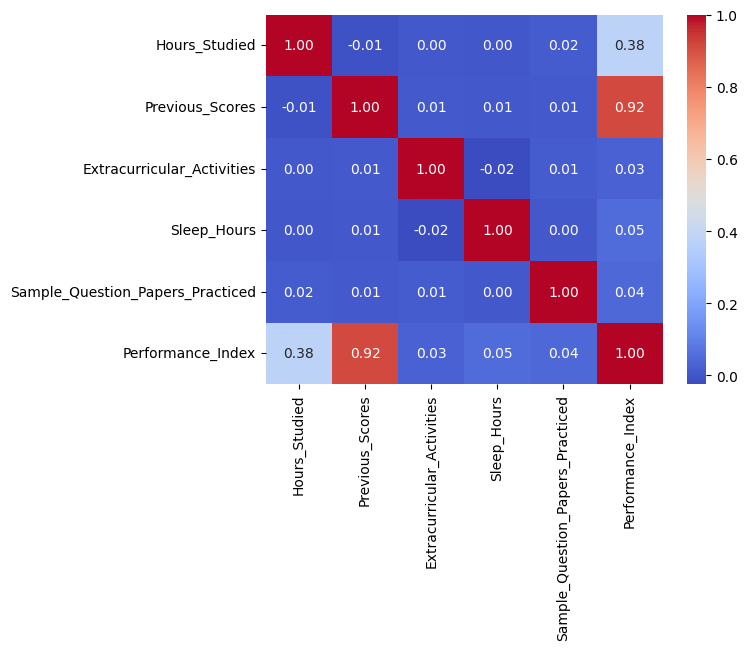

In [26]:
# Co-relation matrix
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap ='coolwarm', fmt=".2f")
plt.show()

In [27]:
x = df['Previous_Scores']
y = df['Performance_Index']

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25) # 25% of data are for testing

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression() # storing Model with a shorter name

In [ ]:
# x_scale = scaled_data[1]

In [ ]:
# lr.fit(x_train.values.reshape(-1, 1), y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [32]:
y_pred = lr.predict(x_test.values.reshape(-1, 1))

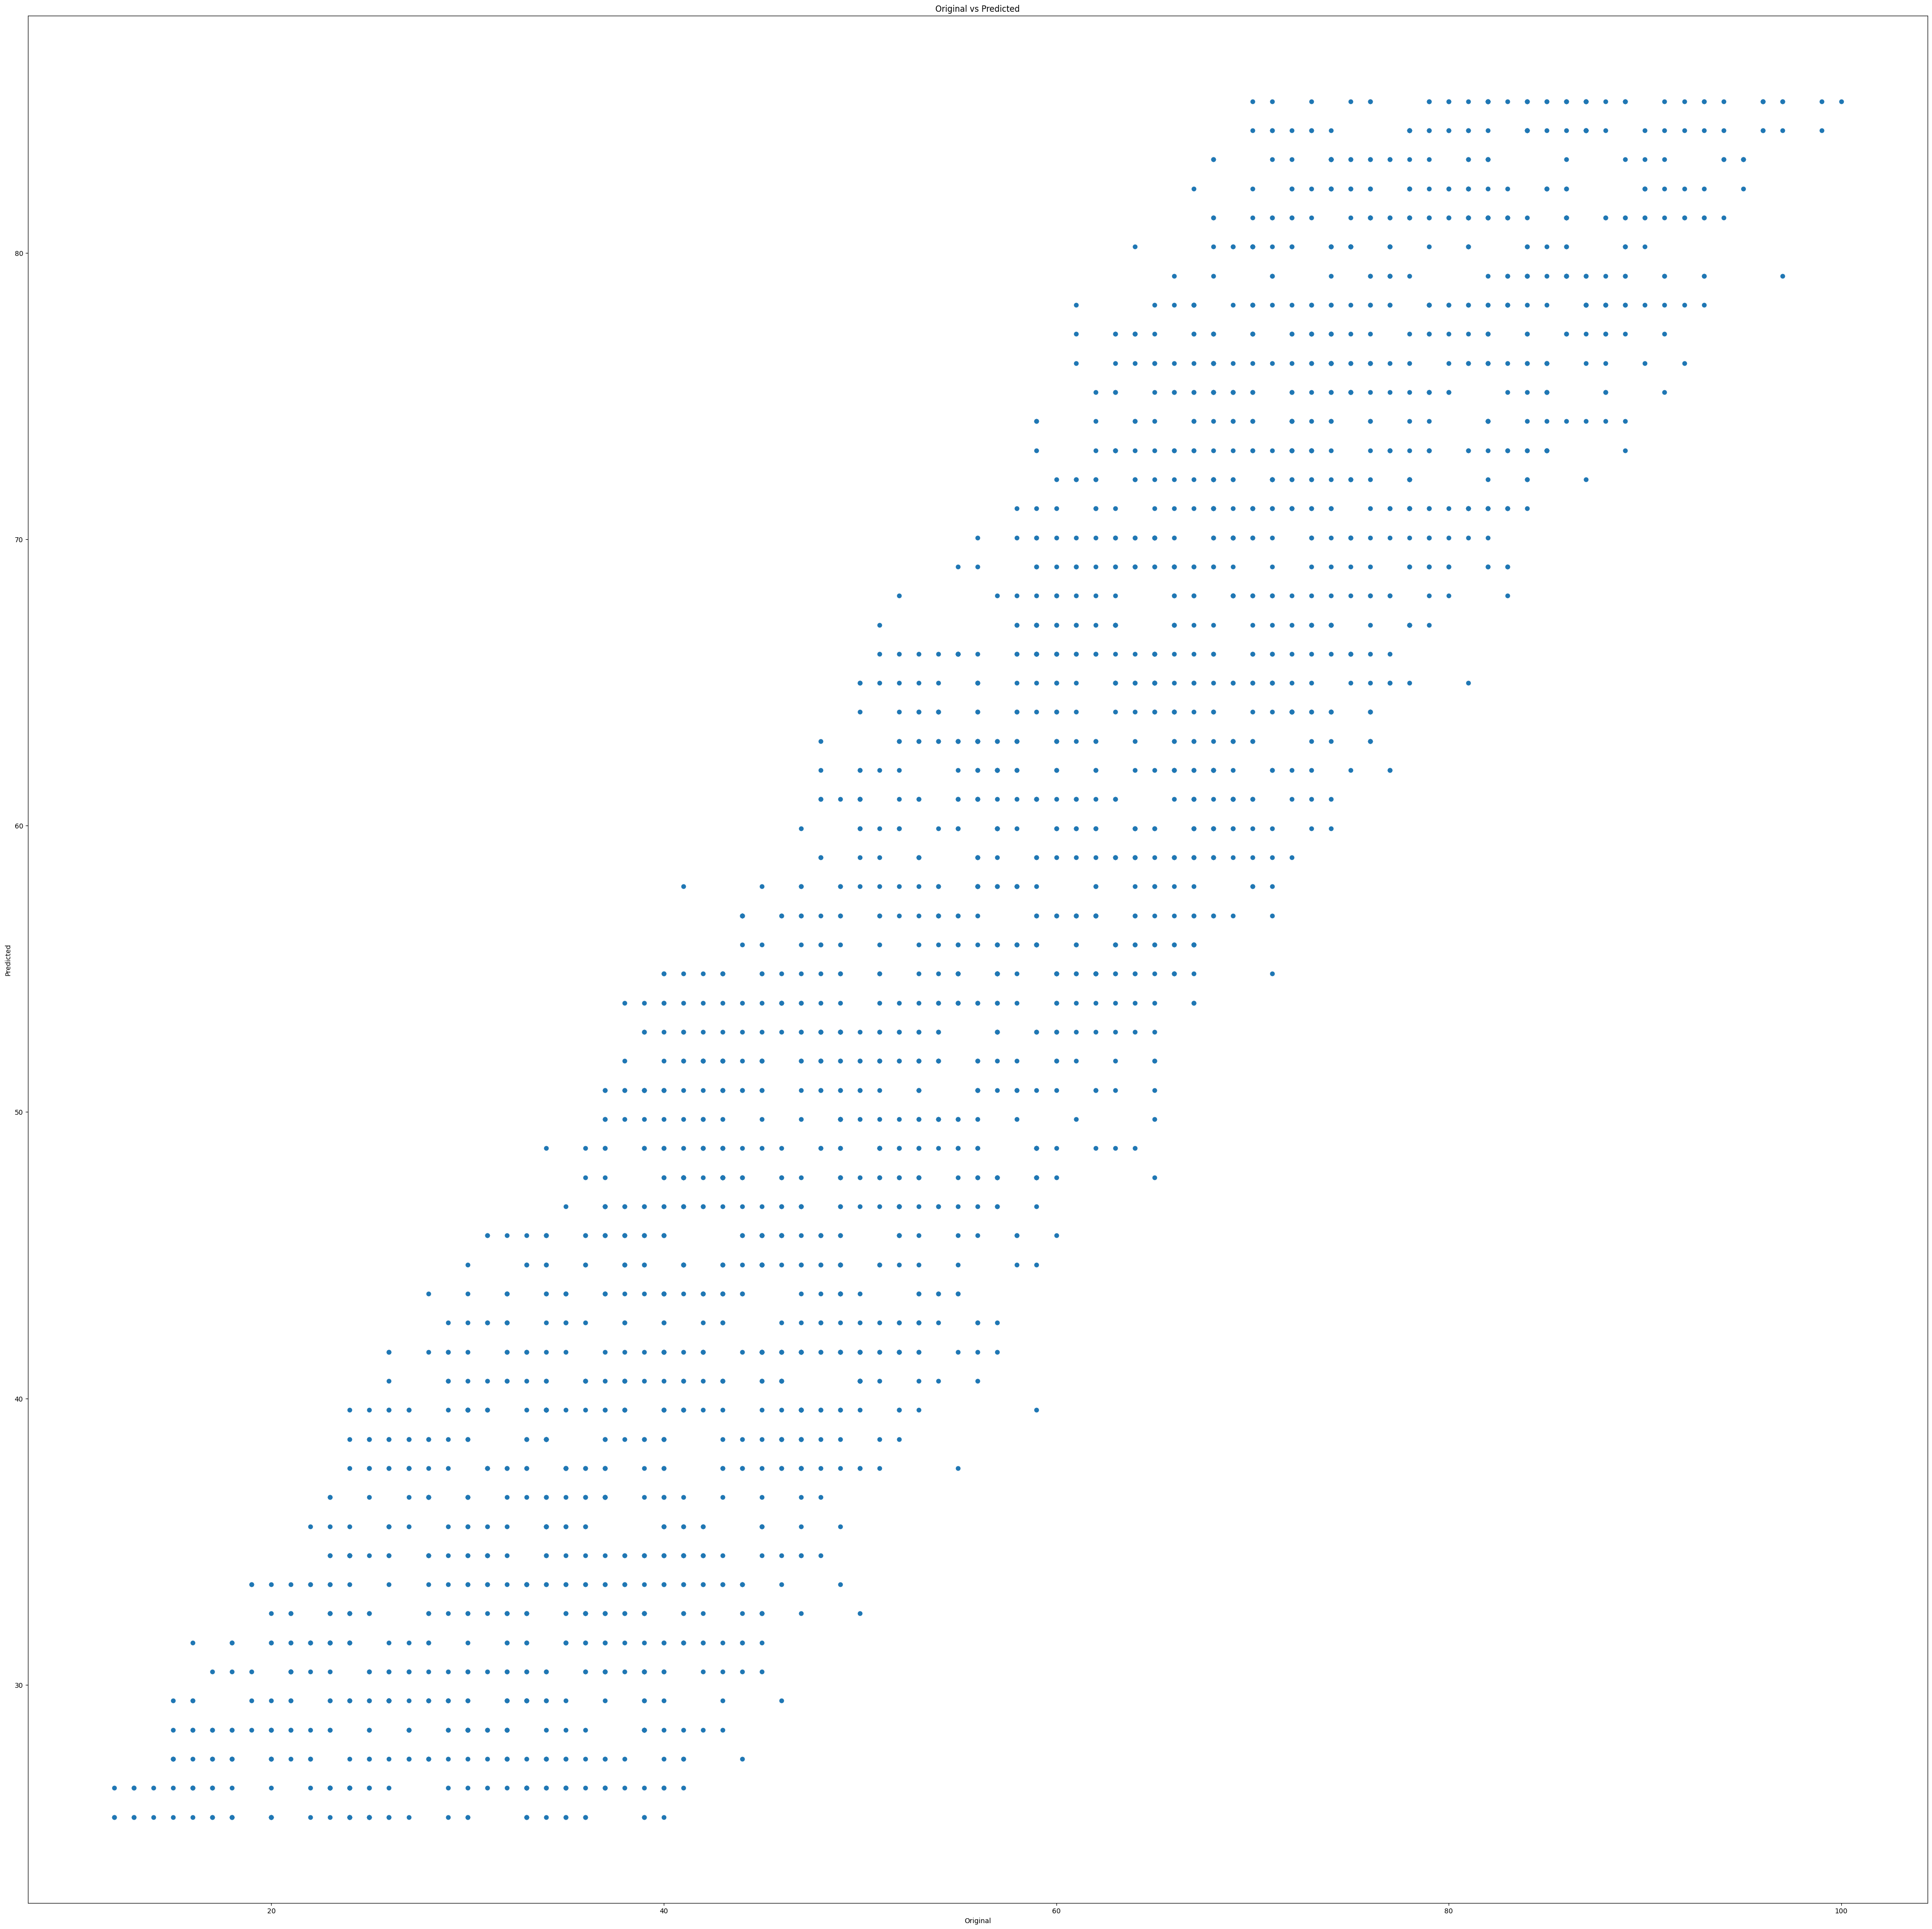

In [40]:
plt.figure(figsize=(50,50))
plt.scatter(y_test, y_pred)

plt.xlabel('Original')
plt.ylabel('Predicted')
plt.title('Original vs Predicted')
plt.show()